In [16]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

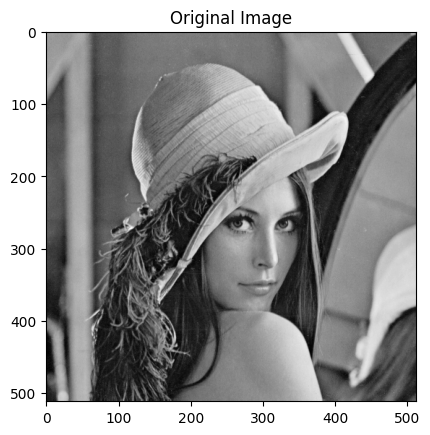

In [17]:
original_image=Image.open('Lenna.png') # 引入图片
original_image=original_image.convert("L") # 灰度处理
alter_image=(np.array(original_image)-np.mean(np.array(original_image)))/255 # 减去均值

plt.imshow(alter_image,cmap='gray')
plt.title("Original Image")
plt.show()

In [18]:
image_array=np.zeros((64*64,64))
idx=0
for i in range(0,64):
    for j in range(0,64):
        image_array[idx]=alter_image[i*8:i*8+8,j*8:j*8+8].reshape(1,64)
        idx+=1
print(image_array)


[[ 0.14883614  0.14883614  0.14883614 ...  0.13707144  0.12530673
   0.1292283 ]
 [ 0.16060085  0.14491457  0.14883614 ...  0.11354203  0.11354203
   0.10569889]
 [ 0.1292283   0.12530673  0.14491457 ...  0.11354203  0.10962046
   0.10962046]
 ...
 [-0.15704621 -0.16488935 -0.19234033 ... -0.32567366 -0.32175209
  -0.29037954]
 [-0.28253641 -0.29430111 -0.28253641 ... -0.20410503 -0.18841876
  -0.16096778]
 [-0.26292856 -0.28645797 -0.24724229 ... -0.07861484 -0.07469327
  -0.06292856]]


In [19]:
rate=5e-5
epochs=50
w=np.random.random([64*64,64])*0.005
Y=np.zeros((4096,1))
for _ in range(epochs):
    z=np.zeros((1,64))
    for i in range(64*64):
        y=np.dot(image_array[i],w[i].T)
        Y[i]=y
        a=w[i]*y
        w[i]=w[i]+rate*y*(image_array[i]-z-a)
        z+=a
print(w)
print(Y)

X=np.zeros((4096,64))
for i in range(4096):
    X[i]=w[i]*Y[i]
print(X)

[[2.67163153e-03 4.58531153e-03 3.59328776e-03 ... 1.07376063e-03
  1.34695539e-05 1.96586253e-03]
 [3.44071036e-03 2.96871074e-03 4.92286372e-03 ... 7.59821409e-04
  3.39363246e-03 2.40292814e-03]
 [2.59387824e-03 4.22042644e-03 4.09463075e-03 ... 1.46830137e-03
  2.66593896e-03 2.48021984e-03]
 ...
 [3.36662992e-03 4.02686521e-03 1.17641162e-03 ... 2.84552408e-04
  1.95957251e-03 1.81090243e-03]
 [3.77733600e-04 1.85967546e-03 2.99692096e-04 ... 6.79344518e-05
  3.17556024e-03 3.83825094e-03]
 [1.97391362e-03 1.44592160e-03 3.02764203e-03 ... 4.11455860e-03
  1.26741083e-03 1.92389516e-03]]
[[ 0.02383666]
 [ 0.02347535]
 [ 0.01798929]
 ...
 [-0.05011025]
 [-0.04199389]
 [-0.02636879]]
[[ 6.36827779e-05  1.09298521e-04  8.56519861e-05 ...  2.55948693e-05
   3.21069204e-07  4.68596008e-05]
 [ 8.07718936e-05  6.96915354e-05  1.15565968e-04 ...  1.78370765e-05
   7.96667232e-05  5.64095887e-05]
 [ 4.66620325e-05  7.59224824e-05  7.36595072e-05 ...  2.64137018e-05
   4.79583537e-05  4.461

[[ 6.36827779e-05  1.09298521e-04  8.56519861e-05 ...  4.17041866e-05
   1.98830687e-05  3.91171927e-05]
 [ 2.24726696e-05  2.32009935e-05  2.76129196e-05 ...  2.21612786e-05
   4.32683641e-05  2.67149675e-05]
 [ 2.19978901e-05  1.35612006e-05  1.04873044e-04 ...  7.64549183e-06
   4.51833019e-05  1.26162575e-05]
 ...
 [-2.13942065e-04 -5.01700295e-05 -5.89613420e-05 ... -6.82863944e-05
  -7.30506234e-05 -3.37467188e-05]
 [-8.15168621e-05 -5.69146015e-05 -1.74219264e-04 ... -2.59579894e-05
  -2.24091531e-06 -9.48315695e-05]
 [-1.73516815e-05 -1.71805099e-04 -8.88703509e-05 ... -1.08495932e-04
  -3.34200900e-05 -5.07307876e-05]]


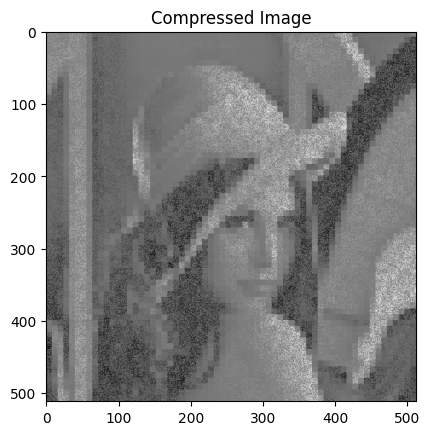

In [20]:
new_image=np.zeros([512,512])
idx=0
for i in range(0,64):
    for j in range(0,64):
        new_image[i*8:i*8+8,j*8:j*8+8]=X[idx].reshape(8,8)
        idx+=1
print(new_image)

plt.imshow(new_image,cmap="gray")
plt.title("Compressed Image")
plt.savefig('Compressed.png',dpi=600)
plt.show()

